### AT2 differential expression analysis

In [2]:
# import packages 
import scanpy.external as sce
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from seaborn import despine
from seaborn import axes_style
from matplotlib.pyplot import suptitle
import matplotlib.colors

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

subset_results_file = './write/invivo_epithelial_subset.h5ad'
adata_subset = sc.read(subset_results_file)

# Work around for re-laoding issue in Scanpy
adata_subset.raw._varm = None

# make at2 subset
adata_at2 = adata_subset[adata_subset.obs['louvain_r0.2'].isin(['0','1'])]

scanpy==1.4.4 anndata==0.6.22 umap==0.3.10 numpy==1.18.1 scipy==1.4.1 pandas==0.23.4 scikit-learn==0.22.1 statsmodels==0.11.0


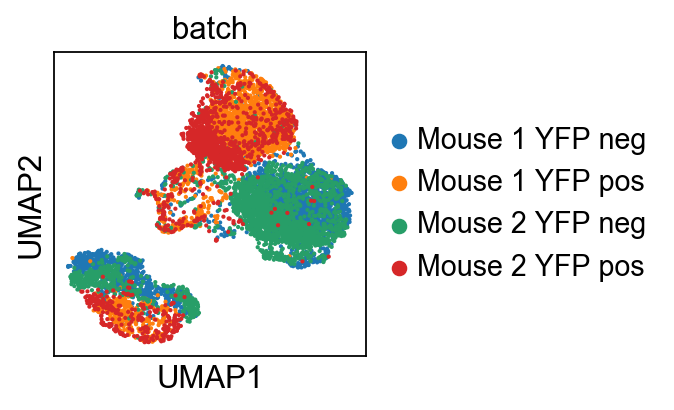

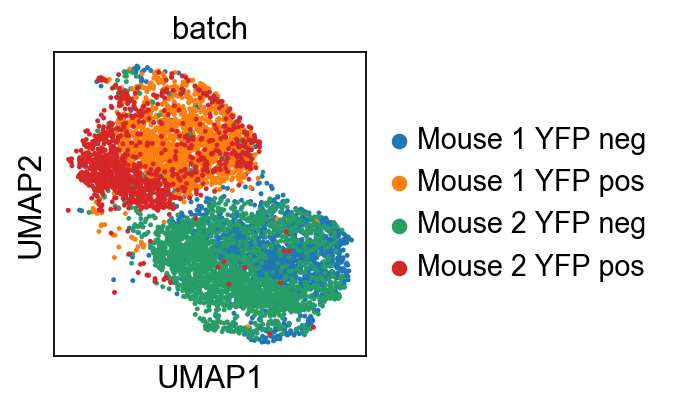

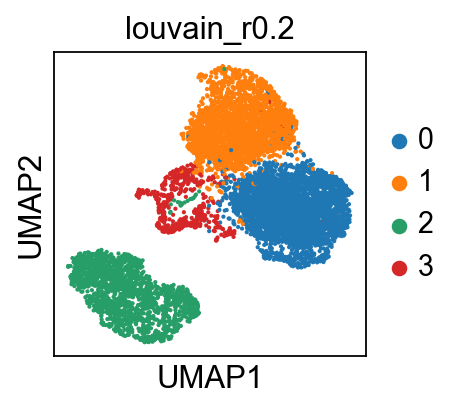

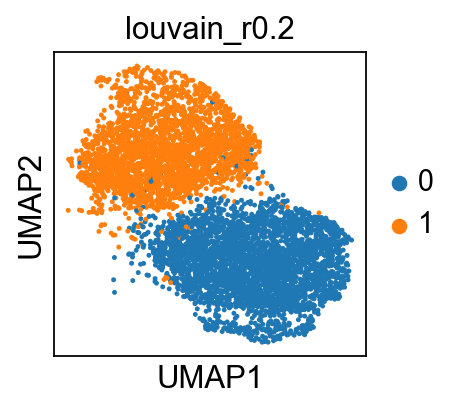

In [3]:
sc.settings.set_figure_params(dpi=80) # aesthetic

list = [adata_subset, adata_at2]
figsize = 2.5,2.5

for i in list:
    rcParams['figure.figsize']=figsize
    sc.pl.umap(i, color='batch', show = False)
    
for i in list:
    rcParams['figure.figsize']=figsize
    sc.pl.umap(i, color='louvain_r0.2', show = False)

In [4]:
# Perform DE analysis using the two AT2 clusters

sc.tl.rank_genes_groups(adata_at2, 'louvain_r0.2', method='wilcoxon', n_genes=1000, use_raw=True)

result = adata_at2.uns['rank_genes_groups']
groups = result['names'].dtype.names

# export filtered DE results to excel 
de_at2 = pd.DataFrame({group + '_' + key[:1]: result[key][group] for group in groups for key in ['names', 'pvals_adj','logfoldchanges']})
de_at2.to_excel("at2_only_DE_top1000.xlsx", sheet_name='Top 1000')

ranking genes
    finished (0:00:07)
